## 🌤️ Ohio Weather Data Script

This Python script retrieves current weather data (temperature, condition, wind speed, and humidity) for a list of cities in Ohio using the WeatherAPI.


### 📦 Requirements
- `requests`
- `pandas`
- A valid WeatherAPI key
- United States Cities Data

### 🧠 How It Works
- Calls the WeatherAPI for each city
- Extracts weather details
- Stores the data as rows in a DataFrame
- Prints the final DataFrame with cities as rows

### 🧾 Code

### Libraries

In [46]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

### WeatherAPI details

In [47]:

API_KEY = '3764f87482df4446a4500427251305'
BASE_URL = "http://api.weatherapi.com/v1/current.json"


### Read US cities data from a CSV file and filter out cities located in Ohio

In [48]:
# Load US cities data
us_cities = pd.read_csv('uscities.csv')

# Filter cities in Hamilton County, Ohio
hamilton_cities = us_cities[(us_cities['state_name'] == 'Ohio') & (us_cities['county_name'] == 'Hamilton')]['city'].unique()

In [49]:
# Function to get weather data for each city
def get_weather(city):
    params = {
        "key": API_KEY,
        "q": city
    }
    
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        data = response.json()
        weather_info = {
            "City": data["location"]["name"],
            "Region": data["location"]["region"],
            "Country": data["location"]["country"],
            "Local Time": data["location"]["localtime"],
            "Temperature (C)": data["current"]["temp_c"],
            "Condition": data["current"]["condition"]["text"],
            "Wind (kph)": data["current"]["wind_kph"],
            "Humidity": data["current"]["humidity"],
            "Feels Like (C)": data["current"]["feelslike_c"]
        }
        return weather_info
    else:
        return None


In [50]:
# List to store weather details for all cities
weather_data = []

# Loop through each city in Hamilton County and get the weather
for city in hamilton_cities:    
    weather_info = get_weather(city)
    if weather_info:
        weather_data.append(weather_info)
    time.sleep(1)  # To avoid hitting the API rate limit    


In [51]:
# Convert the list of weather data into a DataFrame
weather_df = pd.DataFrame(weather_data)

In [52]:
# Save the DataFrame to a CSV file
weather_df.to_csv('hamilton_county_weather.csv', index=False)

print(f"Weather data for Hamilton County cities has been saved to 'hamilton_county_weather.csv'")

Weather data for Hamilton County cities has been saved to 'hamilton_county_weather.csv'


In [53]:
# Display the DataFrame with weather information for cities in Hamilton County
#weather_df

# Save the DataFrame to an Excel file
#weather_df.to_excel('hamilton_county_weather.xlsx', index=False)


## Data Visualization

### 1. 💧 Scatter Plot: Temperature vs. Humidity

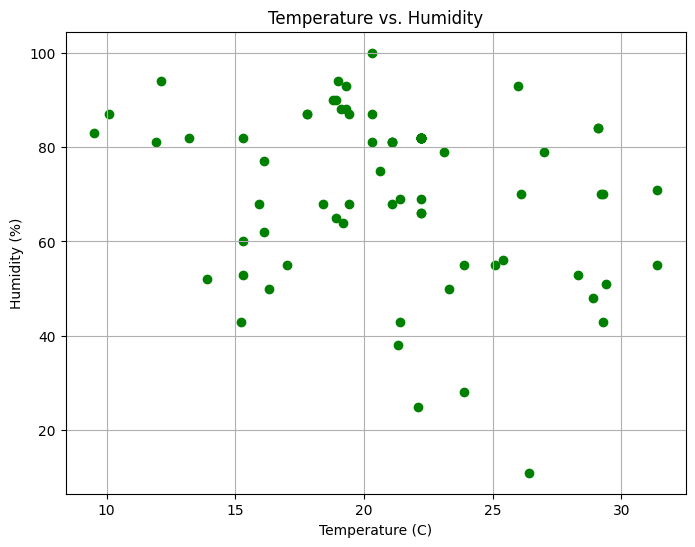

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(weather_df['Temperature (C)'], weather_df['Humidity'], color='green')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.grid(True)
plt.show()


### 2. Horizontal bar chart - Weather Pattern Distribution in Hamilton County 

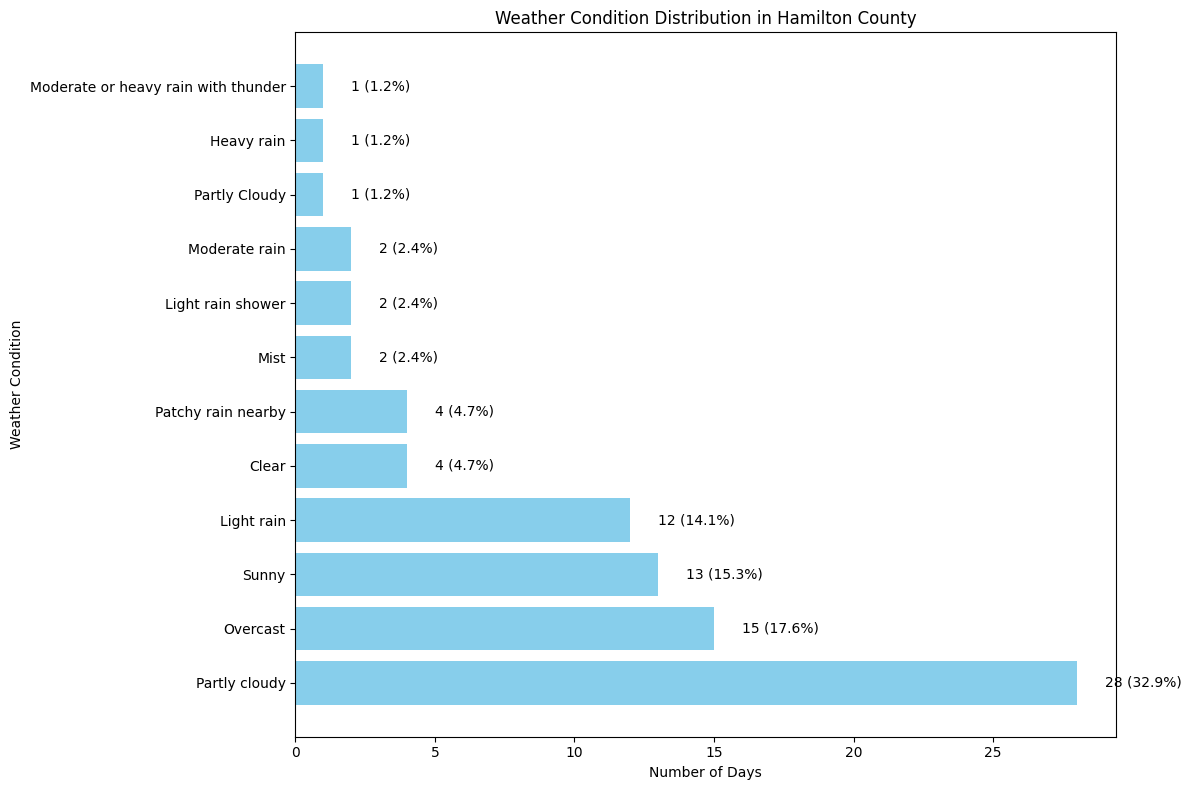

In [55]:

# Get condition counts
condition_counts = weather_df['Condition'].value_counts()

# Set figure size
plt.figure(figsize=(12, 8))

# Create horizontal bar chart
bars = plt.barh(condition_counts.index, condition_counts.values, color='skyblue')

# Add data labels to the bars
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Position text to the right of each bar
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width()} ({(bar.get_width() / condition_counts.sum()) * 100:.1f}%)',
        va='center'
    )

# Add titles and labels
plt.title('Weather Condition Distribution in Hamilton County')
plt.xlabel('Number of Days')
plt.ylabel('Weather Condition')

# Tight layout for better spacing
plt.tight_layout()
plt.show()


### 3.💨 Bar Chart: Wind Speed by City

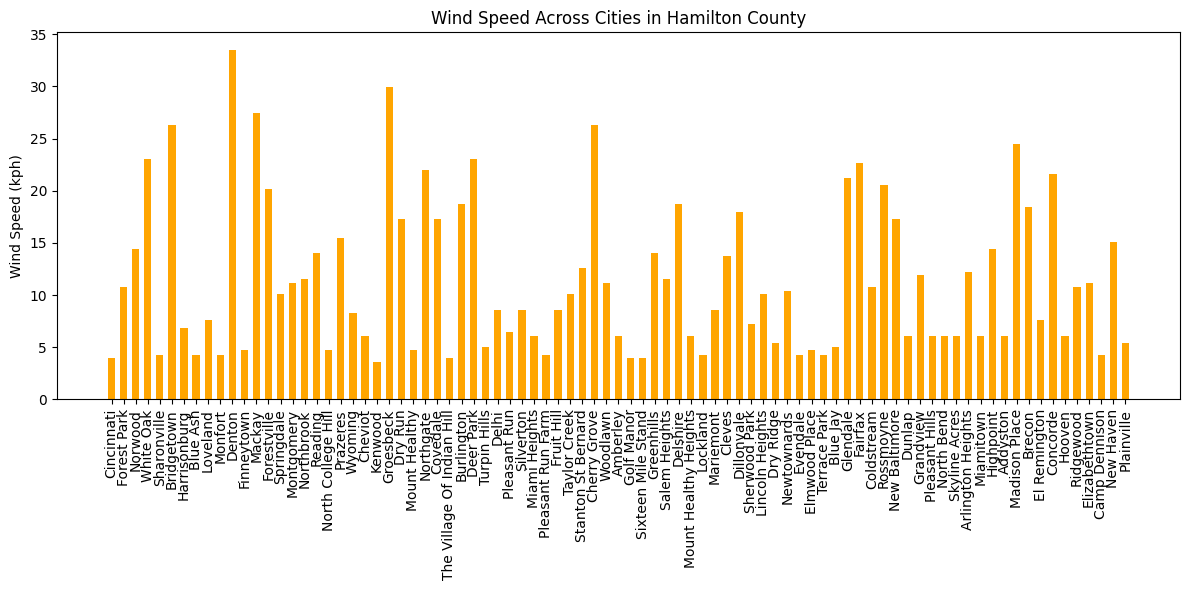

In [56]:
plt.figure(figsize=(12,6))
plt.bar(weather_df['City'], weather_df['Wind (kph)'], color='orange',width=0.6)
plt.xticks(rotation=90)
plt.ylabel('Wind Speed (kph)')
plt.title('Wind Speed Across Cities in Hamilton County')
plt.tight_layout()
plt.show()
